<a href="https://colab.research.google.com/github/wanjiku-wairimu1/Text-Mining/blob/main/TextMining_Laudis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The goal of this exercise is to get a text on a herbicide(Laudis), extract key words from it and then visualize the results

In [1]:
url = "https://www.cropscience.bayer.us/d/laudis-herbicide"

STEP 1: Getting the Data using Request Library


In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html><html lang="en-us"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1"/><link rel="canonical" href="https://www.cropscience.bayer.us/d/laudis-herbicide"/><link rel="icon" type="image/x-icon" data-testid="favicon" href="/favicon.ico"/><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"/><link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png"/><link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png"/><link rel="manifest" href="/site.webmanifest" crossorigin="use-credentials"/><link rel="mask-icon" href="/safari-pinned-tab.svg" color="#9d9d9d"/><meta name="apple-mobile-web-app-title" content="Bayer Farmer Experience"/><meta name="application-name" content="Bayer Farmer Experience"/><meta name="msapplication-TileColor" content="#ffffff"/><meta name="theme-color" content="#ffffff"/><meta name="description" content="Laudis® postemergence herbicide provides pow

STEP 2: Transforming the Data


In [3]:
from html.parser import HTMLParser
class MyHTMLParser(HTMLParser):
  script = False
  res = ""
  def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
  def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
  def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Laudis Herbicide | Crop Science US CROP PROTECTION Laudis Herbicide Herbicide Laudis® postemergence herbicide provides powerful residual grass and broadleaf control combined with crop safety. Approved In AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY product details expand_more Group Number Formula Registration Number GROUP HERBICIDE  liquid 0000264-00860-ZA-0000000 active ingredients expand_more Active Ingredient Formulation Tembotrione 34.5 % Labels / MSDS Use and Mixing The instructions for use and mixing described below are from the Environmental Protection Agency approved Federal Label.  Always read and follow label instructions.  Not all products are registered for use in every state. Please check with Bayer or your local Lead State Agency for product registration status. If you wish to find out if a product is registered in your

In [4]:
#Getting Insights
#installing the library incase it is not already present
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 13.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=656149742e838368d81f60a0512e98e0a9d63974e2fd5f5c719fe7a4899c63fe
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
#extracting the keywords
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('strictly prohibited', 4.0),
 ('local dealer', 4.0),
 ('standard offering', 4.0),
 ('confer tolerance', 4.0),
 ('active ingredients', 3.833333333333333),
 ('basic offering', 3.833333333333333),
 ('spray tank', 3.8),
 ('unregistered pesticide', 3.75),
 ('poncho®/votivo® offering', 3.75),
 ('xtendflex® technology', 3.75),
 ('xtendimax® herbicide', 3.625),
 ('registered trademark', 3.107142857142857),
 ('pesticide', 1.75),
 ('refuge', 1.5),
 ('application', 1.4285714285714286),
 ('bayer', 1.4166666666666667),
 ('products', 1.4),
 ('registered', 1.3571428571428572),
 ('product', 1.3333333333333333),
 ('mixing', 1.2857142857142858),
 ('trademarks', 1.2857142857142858),
 ('restrictions', 1.25),
 ('elite', 1.25),
 ('forecasts', 1.25),
 ('formulations', 1.25),
 ('state', 1.2222222222222223),
 ('planting', 1.2),
 ('check', 1.1666666666666667),
 ('glufosinate', 1.1666666666666667),
 ('design®', 1.15),
 ('dicamba', 1.1428571428571428),
 ('approved', 1.0),
 ('instructions', 1.0),
 ('glyphosate',

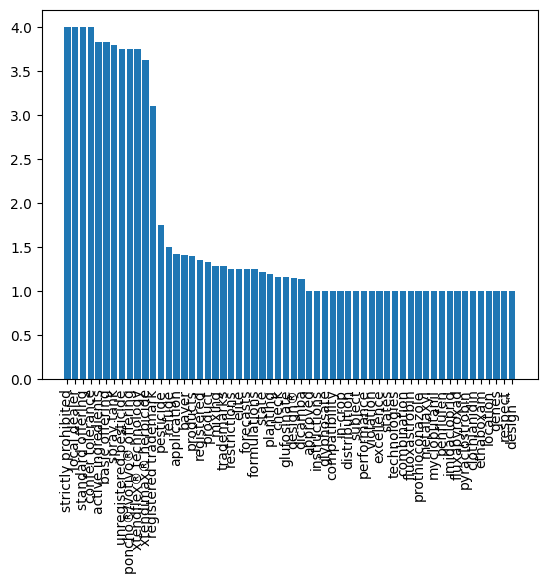

In [6]:
#Visualizing the result
#Using Matplotlib
import matplotlib.pyplot as plt

def plot(pair_list):
    x,y = zip(*pair_list)
    plt.bar(range(len(x)),y)
    plt.xticks(range(len(x)),x,rotation='vertical')
    plt.show()

plot(res)

In [7]:
#Using WordCloud
!{sys.executable} -m pip install wordcloud

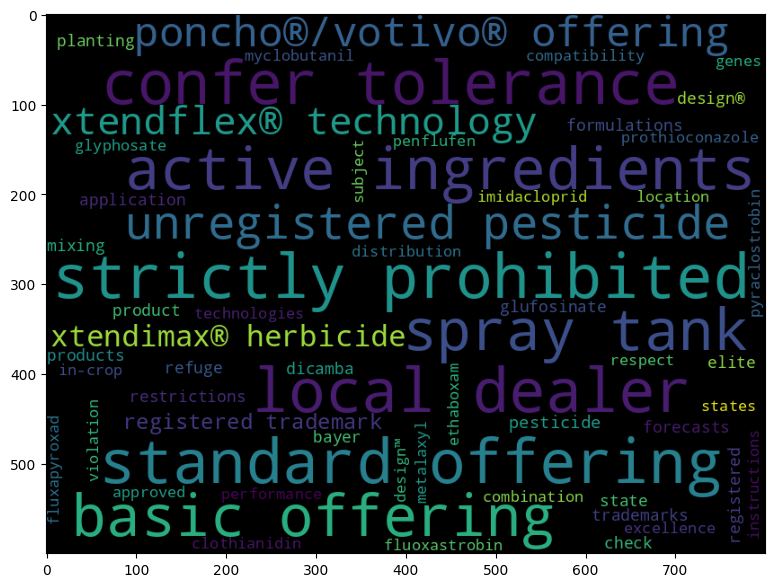

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color='black',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))